In [47]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
DATASET_DIR = "brain_tumor_dataset"
CATEGORIES = ["no", "yes"]
IMG_SIZE = 128

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DATASET_DIR, category)
    class_label = CATEGORIES.index(category)

    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0  # Normalize
            data.append(img)
            labels.append(class_label)
        except Exception as e:
            print(f"⚠️ Error loading image {img_name}: {e}")

In [49]:
data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 202
Testing samples: 51


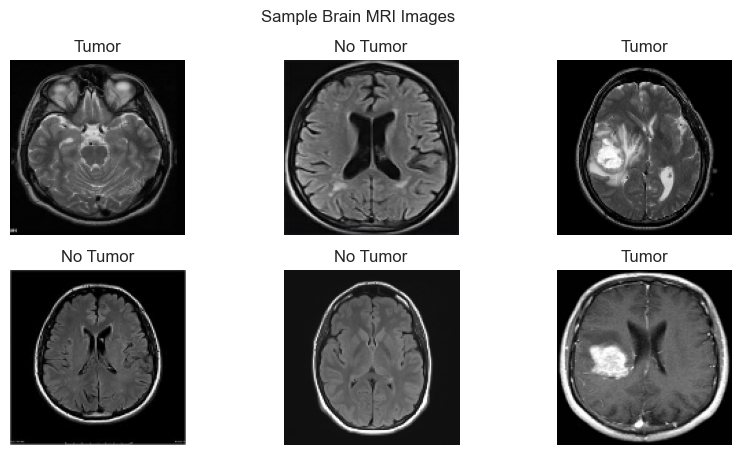

In [64]:
plt.figure(figsize=(10,5))
for i in range(6):
    index = np.random.randint(0, len(X_train))
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[index])
    plt.title("Tumor" if y_train[index] == 1 else "No Tumor")
    plt.axis("off")
plt.suptitle("Sample Brain MRI Images")
plt.savefig('visuals/Brain MRI Images Samples.png')
plt.show()

In [51]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 461ms/step - accuracy: 0.5776 - loss: 0.7952 - val_accuracy: 0.7561 - val_loss: 0.6084
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.7019 - loss: 0.5996 - val_accuracy: 0.7561 - val_loss: 0.5012
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.7267 - loss: 0.5641 - val_accuracy: 0.7805 - val_loss: 0.4930
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - accuracy: 0.6522 - loss: 0.6497 - val_accuracy: 0.8049 - val_loss: 0.5067
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 393ms/step - accuracy: 0.7081 - loss: 0.5747 - val_accuracy: 0.7561 - val_loss: 0.5228
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 385ms/step - accuracy: 0.6832 - loss: 0.5754 - val_accuracy: 0.7805 - val_loss: 0.4844
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.7143 - loss: 0.5693 - val_accuracy: 0.8780 - val_loss: 0.4598
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.7702 - loss: 0.5282 - val_accuracy: 0.8780 - val_loss:

In [55]:
sns.set_style('darkgrid')

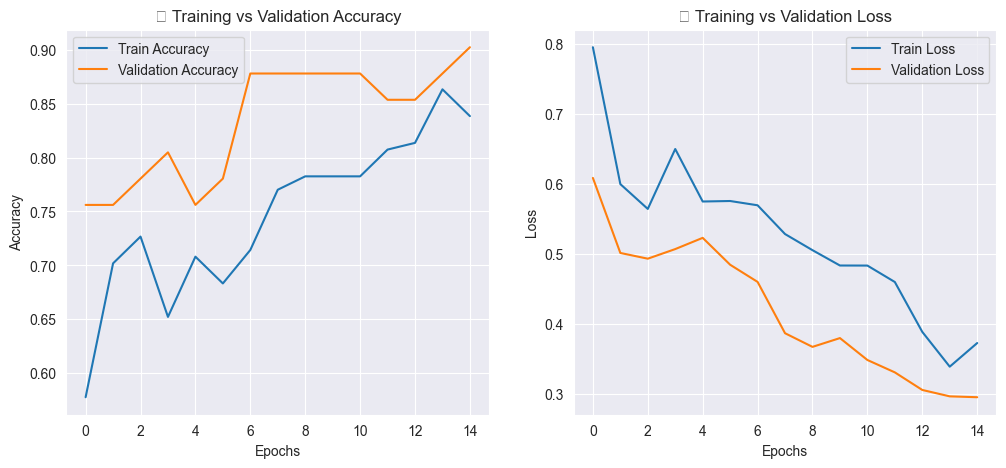

In [65]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('📈 Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('📉 Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('visuals/Training vs Validation Accuracy & Loss.png')
plt.show()

In [57]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9412 - loss: 0.2758
Test Accuracy: 0.9412
Test Loss: 0.2758


In [58]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


In [59]:
print("📊 Classification Report:\n", classification_report(y_test, y_pred_classes))

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.94      0.97      0.95        31

    accuracy                           0.94        51
   macro avg       0.94      0.93      0.94        51
weighted avg       0.94      0.94      0.94        51



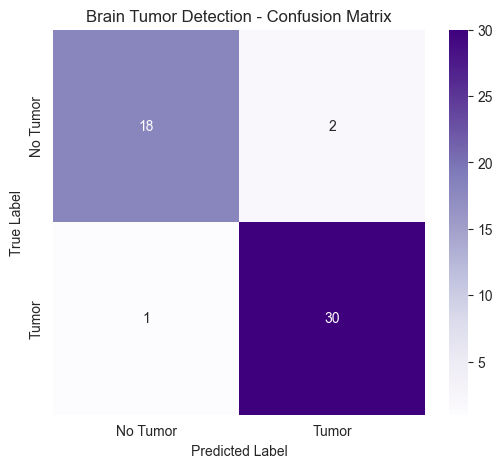

In [66]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"])
plt.title("Brain Tumor Detection - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('visuals/Brain Tumor Confusion Matrix.png')
plt.show()

In [61]:
def predict_brain_tumor(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0][0]
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")

    if prediction > 0.5:
        plt.title("Tumor Detected (Yes)")
        print("Prediction: Tumor Detected (Yes)")
    else:
        plt.title("No Tumor Detected")
        print("Prediction: No Tumor Detected")
    plt.show()

----

#### **Brain Tumor Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
Prediction: Tumor Detected (Yes)


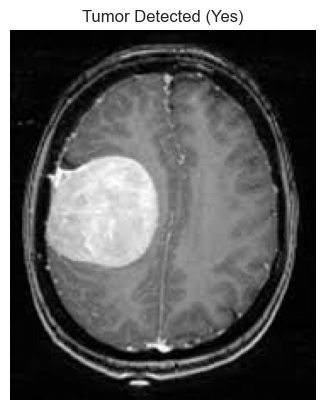

In [70]:
predict_brain_tumor("brain_tumor_dataset/yes/Y1.jpg")